In [25]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Transformação da melodia em ranhuras na estrada

In [26]:
# Transformação do arquivo de audio WAV em um vetor y x t
from scipy.io import wavfile

sample_rate, data = wavfile.read('test.wav')

print(sample_rate)


44100


In [27]:
print(data)

[[ 0  0]
 [ 0  0]
 [ 0  0]
 ...
 [33 11]
 [32 14]
 [32 18]]


# Meu dev

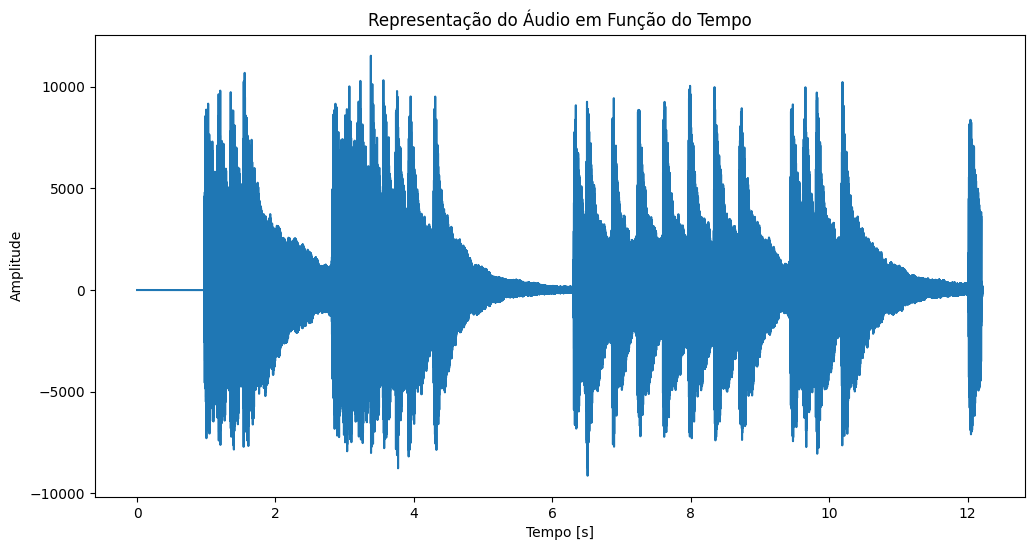

In [28]:
# possui dois canais, escolher somente um
if data.ndim > 1:
    data_y = data[:, 0]

duration = len(data) / sample_rate
time = np.linspace(0., duration, len(data))

plt.figure(figsize=(12, 6))
plt.plot(time, data_y)
plt.title('Representação do Áudio em Função do Tempo')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.show()

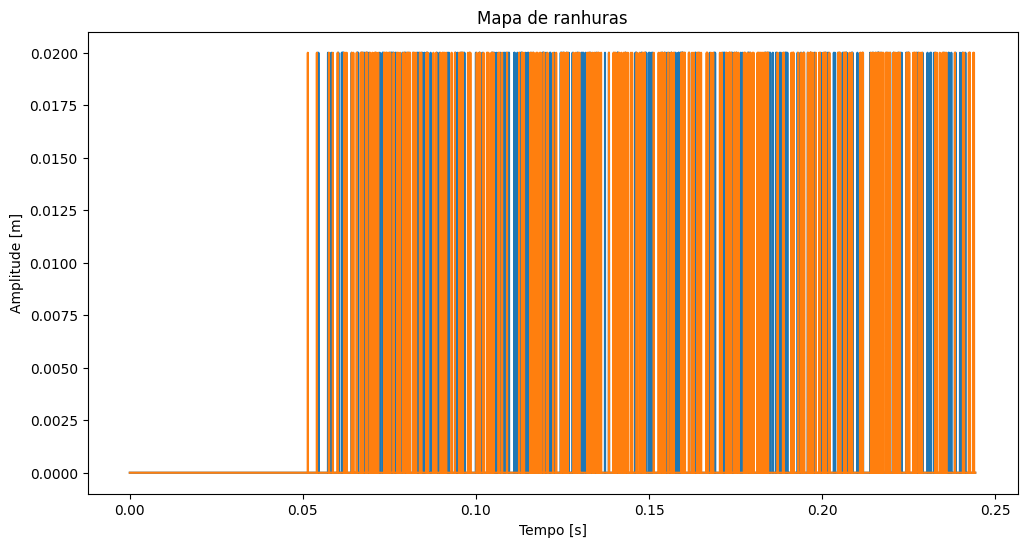

In [29]:
# Transformação do vetor anterior em um vetor para uma onda quadrada y x m. Considere
# a profundidade de cada ranhura constante e igual a 2 cm.

# teste com um segmento pequeno

# Definir um limiar para a onda quadrada
limiar = 0.1

# Transformar em onda quadrada
data_square = np.where(data >= limiar, 1, 0)

# Mapear a profundidade das ranhuras
PROFUNDIDADE = 0.02  # 2 cm
data_y_m = data_square * PROFUNDIDADE

# teste com um segmento pequeno
data_y_m = data_y_m[0:int(0.02*len(data_y_m))]
time_y_m = time[0:int(0.02*len(time))]
plt.figure(figsize=(12, 6))
plt.plot(time_y_m, data_y_m)
plt.title('Mapa de ranhuras')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude [m]')
plt.show()

In [30]:
# Definição do mapa de ranhuras (10 linhas de 1 segundo cada)

# Dev do arthur

In [31]:
import librosa
import librosa.display

In [32]:
y, sr = librosa.load('test.wav', sr=None)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


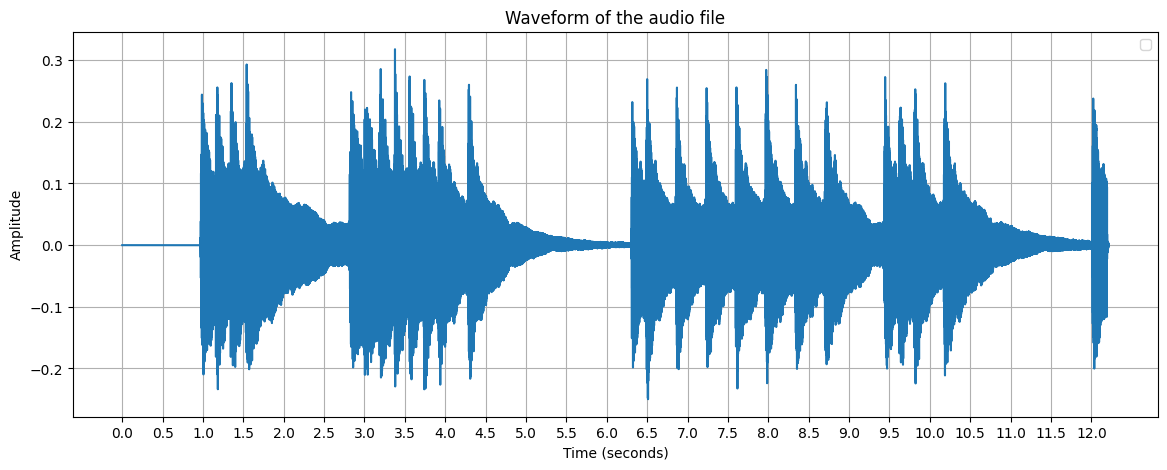

In [33]:
total_time = len(y) / sr
time_stamp = np.linspace(0, total_time, len(y))
plt.figure(figsize=(14, 5))
plt.plot(time_stamp, y)
plt.title('Waveform of the audio file')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(0, 12.5, 0.5))
plt.show()

In [34]:
# Compute the STFT
D = librosa.stft(y, n_fft=2048, hop_length=512)

# Get the magnitude spectrogram
S = np.abs(D)

# Get the frequencies corresponding to the STFT bins
frequencies = librosa.fft_frequencies(sr=sr, n_fft=2048)

# Create a time array for plotting
times = librosa.times_like(S, sr=sr, hop_length=512)

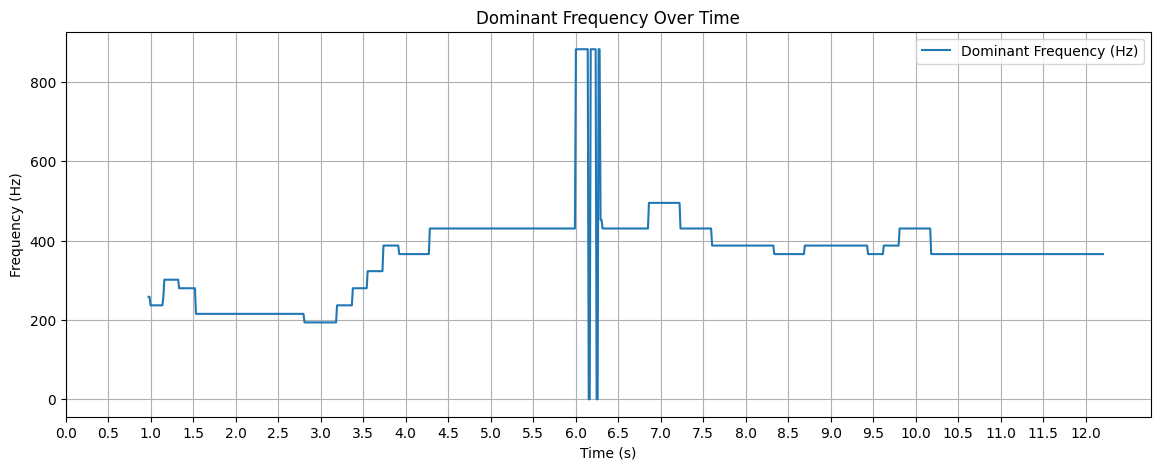

In [35]:
# Find the index of the maximum frequency at each time step
max_indices = np.argmax(S, axis=0)

# Get the corresponding dominant frequencies
dominant_frequencies = frequencies[max_indices]

times = times[84:1052]
dominant_frequencies = dominant_frequencies[84:1052]

dominant_frequencies[178] = dominant_frequencies[177]
dominant_frequencies[285] = dominant_frequencies[286]
dominant_frequencies[475] = dominant_frequencies[474]
dominant_frequencies[476] = dominant_frequencies[474]
dominant_frequencies[950] = dominant_frequencies[951]

df = pd.DataFrame({'t': times, 'f': dominant_frequencies})

# Plotting
plt.figure(figsize=(14, 5))
plt.plot(times, dominant_frequencies, label='Dominant Frequency (Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Dominant Frequency Over Time')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(0, 12.5, 0.5))
plt.show()

In [36]:
df.f.unique()

array([258.3984375 , 236.86523438, 301.46484375, 279.93164062,
       215.33203125, 193.79882812, 322.99804688, 387.59765625,
       366.06445312, 430.6640625 , 882.86132812,   0.        ,
       452.19726562, 495.26367188])

In [43]:
v = 60*3.6 # km/h to m/s

# distância percorrida pelo carro
df['delta_t'] = df['t'] - df['t'].shift(fill_value=0)
df['S [m]'] = v * df['delta_t']

# distancia entre duas ranhuras subsequentes 
df['L [m]'] = v / df['f']

# distância dos degraus
df['D [m]'] = df['L [m]']/2
df['W [m]'] = df['L [m]']/2
df

,t,f,L [m],D [m],W [m],S [m],delta_t
0,0.975238,258.398438,0.835918,0.417959,0.417959,210.651429,0.975238
1,0.986848,258.398438,0.835918,0.417959,0.417959,2.507755,0.011610
2,0.998458,236.865234,0.911911,0.455955,0.455955,2.507755,0.011610
3,1.010068,236.865234,0.911911,0.455955,0.455955,2.507755,0.011610
4,1.021678,236.865234,0.911911,0.455955,0.455955,2.507755,0.011610
...,...,...,...,...,...,...,...
963,12.155646,366.064453,0.590060,0.295030,0.295030,2.507755,0.011610
964,12.167256,366.064453,0.590060,0.295030,0.295030,2.507755,0.011610
965,12.178866,366.064453,0.590060,0.295030,0.295030,2.507755,0.011610
966,12.190476,366.064453,0.590060,0.295030,0.295030,2.507755,0.011610


In [45]:
df.f.unique()

array([258.3984375 , 236.86523438, 301.46484375, 279.93164062,
       215.33203125, 193.79882812, 322.99804688, 387.59765625,
       366.06445312, 430.6640625 , 882.86132812,   0.        ,
       452.19726562, 495.26367188])

In [61]:
actual_dominant_freq = 0
instant_freq = 1
data_array = []
ti=0
tf=0

# iteramos sobre cada linha do df para pegar as frequencias em cada instante
# a partir do momemento que temos uma freq diferente da vista anteriormente
# sabemos o momento exato do fim da freq e o inicio da proxima
for idx, row in df.iterrows():
    instant_time = row['t']
    instant_freq = row['f']

    # caso tenha uma frequencia nova atualizamos a frequencia dominante do trecho
    if actual_dominant_freq != instant_freq:
        tf = instant_time
        data_array.append([instant_freq, ti, tf])
        ti = instant_time
        actual_dominant_freq = instant_freq
df_freq = pd.DataFrame(data_array, columns=['f', 'ti','tf'])

df_freq['S'] = v * df_freq['tf']
df_freq['delta_S'] = v * (df_freq['tf'] - df_freq['ti'])
df_freq

,f,ti,tf,S,delta_S
0,258.398438,0.000000,0.975238,210.651429,210.651429
1,236.865234,0.975238,0.998458,215.666939,5.015510
2,258.398438,0.998458,1.149388,248.267755,32.600816
3,301.464844,1.149388,1.160998,250.775510,2.507755
4,279.931641,1.160998,1.335147,288.391837,37.616327
5,215.332031,1.335147,1.532517,331.023673,42.631837
6,193.798828,1.532517,2.809615,606.876735,275.853061
7,236.865234,2.809615,3.192744,689.632653,82.755918
8,279.931641,3.192744,3.378503,729.756735,40.124082
9,322.998047,3.378503,3.552653,767.373061,37.616327


In [65]:
df_no_duplicated = df[['f', 'L [m]', 'D [m]', 'W [m]']].drop_duplicates()
df_freq_merged = pd.merge(df_freq, df_no_duplicated[['f', 'L [m]', 'D [m]', 'W [m]']], on='f', how='inner')
df_freq_merged

,f,ti,tf,S,delta_S,L [m],D [m],W [m]
0,258.398438,0.000000,0.975238,210.651429,210.651429,0.835918,0.417959,0.417959
1,258.398438,0.998458,1.149388,248.267755,32.600816,0.835918,0.417959,0.417959
2,236.865234,0.975238,0.998458,215.666939,5.015510,0.911911,0.455955,0.455955
3,236.865234,2.809615,3.192744,689.632653,82.755918,0.911911,0.455955,0.455955
4,301.464844,1.149388,1.160998,250.775510,2.507755,0.716501,0.358251,0.358251
5,279.931641,1.160998,1.335147,288.391837,37.616327,0.771617,0.385808,0.385808
6,279.931641,3.192744,3.378503,729.756735,40.124082,0.771617,0.385808,0.385808
7,215.332031,1.335147,1.532517,331.023673,42.631837,1.003102,0.501551,0.501551
8,193.798828,1.532517,2.809615,606.876735,275.853061,1.114558,0.557279,0.557279
9,322.998047,3.378503,3.552653,767.373061,37.616327,0.668735,0.334367,0.334367


In [66]:
df_freq_merged.loc[df_freq_merged['f'] == 0, ['L [m]', 'D [m]', 'W [m]']] = 0
df_freq_merged

,f,ti,tf,S,delta_S,L [m],D [m],W [m]
0,258.398438,0.000000,0.975238,210.651429,210.651429,0.835918,0.417959,0.417959
1,258.398438,0.998458,1.149388,248.267755,32.600816,0.835918,0.417959,0.417959
2,236.865234,0.975238,0.998458,215.666939,5.015510,0.911911,0.455955,0.455955
3,236.865234,2.809615,3.192744,689.632653,82.755918,0.911911,0.455955,0.455955
4,301.464844,1.149388,1.160998,250.775510,2.507755,0.716501,0.358251,0.358251
5,279.931641,1.160998,1.335147,288.391837,37.616327,0.771617,0.385808,0.385808
6,279.931641,3.192744,3.378503,729.756735,40.124082,0.771617,0.385808,0.385808
7,215.332031,1.335147,1.532517,331.023673,42.631837,1.003102,0.501551,0.501551
8,193.798828,1.532517,2.809615,606.876735,275.853061,1.114558,0.557279,0.557279
9,322.998047,3.378503,3.552653,767.373061,37.616327,0.668735,0.334367,0.334367


# Etapa 4 - Simulação

In [40]:
y(t) = Y*sin(wt)

SyntaxError: cannot assign to function call here. Maybe you meant '==' instead of '='? (4034826518.py, line 1)

In [ ]:
# Considere o veículo como sendo um sistema de 1GDL com excitação na base
qsi = 0.3
f0 = 1.5 # Hz
m = [1200, 2400, 4500] # kg
V_kmh = 60 
V_ms = V_kmh/3.6
k =  # decisão de projeto
c = # decisão de projeto

In [ ]:
# 
w = 2 * np.pi * f0 # acho que isso tá errado, acho que a frequencia é um valor médio que pegamos da musica
w_n = np.sqrt(k/m)
r = w / w_n
qsi = c / (2*np.sqrt(k*m[0]))

![title](resposta.png)

In [ ]:
# Sabendo que o som produzido na cabine será proporcional ao seu deslocamento,
# determine para qual massa haverá a maior transmissibilidade. Utilize a curva de
# transmissibilidade de um sistema de 1GDL para justificar a sua resposta.

def calcular_resposta_sistema(Y, t, w, qsi, r):
    """"
    Y: amplitude das ranhuras (y(t) = Y*sen(wt))
    t: vetor do tempo
    w:
    qsi: fator de amortecimento
    r: w/wn

    """
    X = Y * ((1 + 2*qsi*r**2) / ((1 - r**2) + (2*qsi*r)**2))**(1/2)
    phi = np.arctan( 2*qsi*r**3 / (1 + (4*qsi**2 -1)*r**2))

    x_p = X*np.sin(w*t - phi)
    return x_p


def calcular_transmissibilidade(qsi, r):
    Td = ((1 + 2*qsi*r**2) / ((1 - r**2) + (2*qsi*r)**2))**(1/2)
    return Td